In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
x,y = make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
x

array([[-1.27476004,  0.27188771],
       [-0.43373984,  1.2591606 ],
       [ 9.32196824,  6.51363974],
       ...,
       [-3.43019045, -3.06123663],
       [-2.42350438, -2.52122167],
       [-0.54179349,  1.15933544]])

In [4]:
y

array([2, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 0, 0, 0, 2, 1, 2, 0, 0, 1, 1,
       2, 1, 0, 2, 0, 0, 1, 1, 2, 1, 1, 2, 0, 1, 0, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1,
       1, 1, 1, 0, 2, 2, 0, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 0, 2, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1,
       0, 0, 0, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 2, 1, 1, 0, 0, 1, 0, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2, 2, 0,
       2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 2, 1, 0, 2, 0, 2, 2, 0, 2, 1, 2, 0,
       0, 1, 1, 2, 2, 0, 1, 2, 0, 2, 2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 0, 1,
       1, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 1, 0, 1, 1, 0, 2, 1, 0, 0,
       2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0,
       2, 2, 1, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 1,
       0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 2, 1,
       0, 2, 1, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 2,

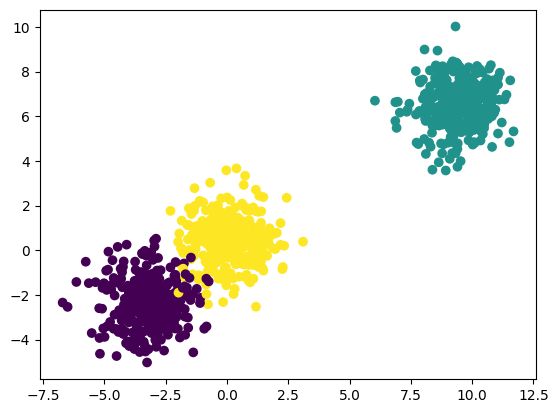

In [5]:
plt.scatter(x[:,0],x[:,1],c=y)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [9]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [10]:
from sklearn.cluster import KMeans

In [13]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train_scaled)
    wcss.append(kmeans.inertia_)

In [14]:
wcss

[1339.9999999999993,
 168.2401135253615,
 65.36803658646399,
 56.9157973455589,
 47.244516979037314,
 36.50102229582879,
 33.441374279626984,
 30.101681394245936,
 27.792605090536046,
 25.252545018537376]

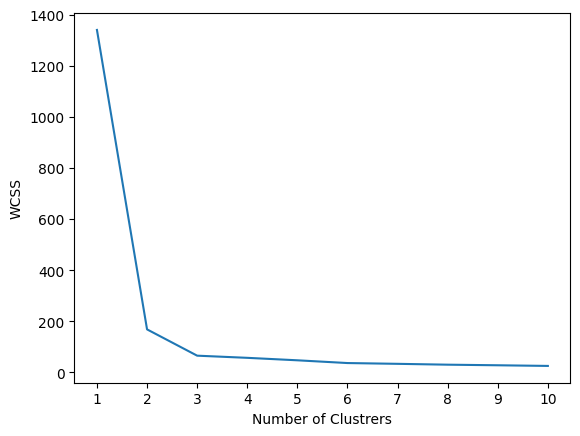

In [15]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [16]:
kmeans = KMeans(n_clusters=3,init="k-means++")

In [17]:
kmeans.fit_predict(x_train_scaled)

array([2, 2, 0, 2, 0, 2, 1, 0, 2, 0, 1, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1,
       1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1,
       1, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 1, 2, 1,
       1, 2, 0, 2, 2, 1, 0, 2, 2, 1, 0, 0, 1, 2, 2, 2, 0, 2, 1, 0, 0, 1,
       2, 1, 2, 1, 2, 1, 0, 2, 2, 0, 2, 1, 1, 0, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1,
       0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1,
       0, 1, 2, 2, 0, 1, 2, 0, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 1, 2, 1, 0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 2,
       1, 2, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1,
       1, 1, 0, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 0, 1,
       0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 2, 0, 2, 1, 0, 1, 0,
       2, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 2, 1,

In [18]:
y_pred = kmeans.predict(x_test_scaled)

In [19]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 1, 1, 0, 2, 2, 0, 0,
       2, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0, 0,
       2, 1, 0, 2, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 1, 2, 1, 2,
       2, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2, 2, 0,
       1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 2,
       2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 1, 2, 0, 1, 2, 1, 2, 0, 2, 2,
       2, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 2, 1, 2, 0, 2,
       2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 1, 2, 1,
       2, 0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 2,
       2, 0, 1, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 0, 1, 0,
       2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 2, 1, 2, 0, 0,

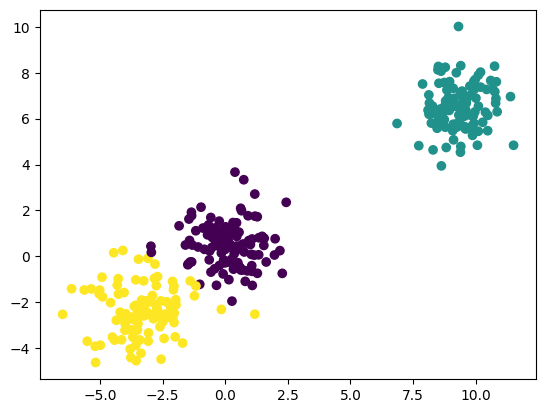

In [20]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)

In [21]:
## Validating the k values
## we use two techniques

## 1. kneelocaotor
## 2. Silhoutee scoring

In [22]:
## 1. kneelocaotor
!pip install kneed

In [23]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")


In [24]:
kl.elbow

2

In [25]:
##Silhoutte score
from sklearn.metrics import silhouette_score


In [26]:
silhouette_coeffifients = []
for k in range(2,11):
    kmenas = KMeans(n_clusters=k,init="k-means++")
    kmenas.fit(x_train_scaled)
    score = silhouette_score(x_train_scaled,kmeans.labels_)
    silhouette_coeffifients.append(score)

In [27]:
silhouette_coeffifients

[0.6757898693791683,
 0.6757898693791683,
 0.6757898693791683,
 0.6757898693791683,
 0.6757898693791683,
 0.6757898693791683,
 0.6757898693791683,
 0.6757898693791683,
 0.6757898693791683]

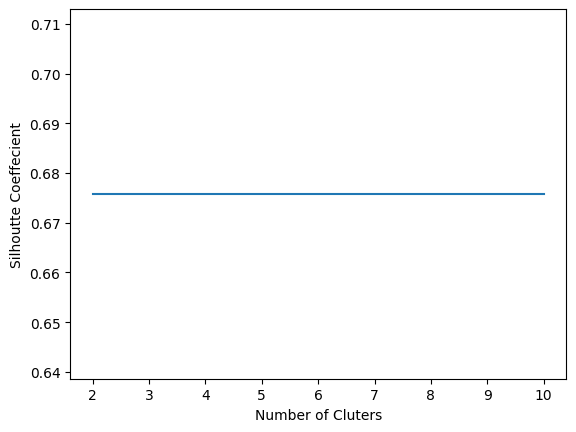

In [28]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coeffifients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()